In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data=pd.read_csv('day8frauddet.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 0:00,0b242abb623afc578575680df30655b9,Jennifer,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 0:00,1f76529f8574734946361c461b024d99,Stephanie,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 0:00,a1a22d70485983eac12b5b88dad1cf95,Edward,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 0:01,6b849c168bdad6f867558c3793159a81,Jeremy,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 0:03,a41d7549acf90789359a9aa5346dcb46,Tyler,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['trans_num']=le.fit_transform(data['trans_num'])
data['first']=le.fit_transform(data['first'])
data['trans_date_trans_time']=le.fit_transform(data['trans_date_trans_time'])
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,0,24,92,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,0,57,180,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,0,317,65,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1,215,93,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,2,320,197,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [40]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
trans_num                0
first                    0
cc_num                   0
merchant                 0
category                 0
amt                      0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [41]:
data.describe()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.00000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000
mean,249.500000,142.792000,249.500000,105.02800,5.144249e+17,77.71566,49008.556000,38.692041,-90.839659,7.599493e+04,1.325388e+09,38.687418,-90.829825,0.106000
std,144.481833,83.003928,144.481833,57.37186,1.431550e+18,97.31961,27363.171916,4.951696,14.934805,2.412157e+05,6.971555e+03,4.993246,14.974978,0.308146
min,0.000000,0.000000,0.000000,0.00000,6.049559e+10,1.10000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.209212,-166.148374,0.000000
25%,124.750000,72.750000,124.750000,53.00000,1.800000e+14,18.64500,23917.750000,35.888775,-98.072700,7.175000e+02,1.325382e+09,35.854024,-97.982226,0.000000
50%,249.500000,143.000000,249.500000,111.00000,3.530000e+15,57.66500,48183.500000,39.708200,-87.764400,2.381500e+03,1.325387e+09,39.484082,-87.728150,0.000000
75%,374.250000,214.250000,374.250000,147.00000,4.840000e+15,92.67500,72042.000000,41.548825,-79.808900,1.535750e+04,1.325394e+09,41.743460,-79.585191,0.000000
max,499.000000,286.000000,499.000000,205.00000,4.990000e+18,1055.47000,99783.000000,64.755600,-67.950300,1.595797e+06,1.325400e+09,65.023497,-68.523008,1.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'trans_num'}>,
        <Axes: title={'center': 'first'}>],
       [<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

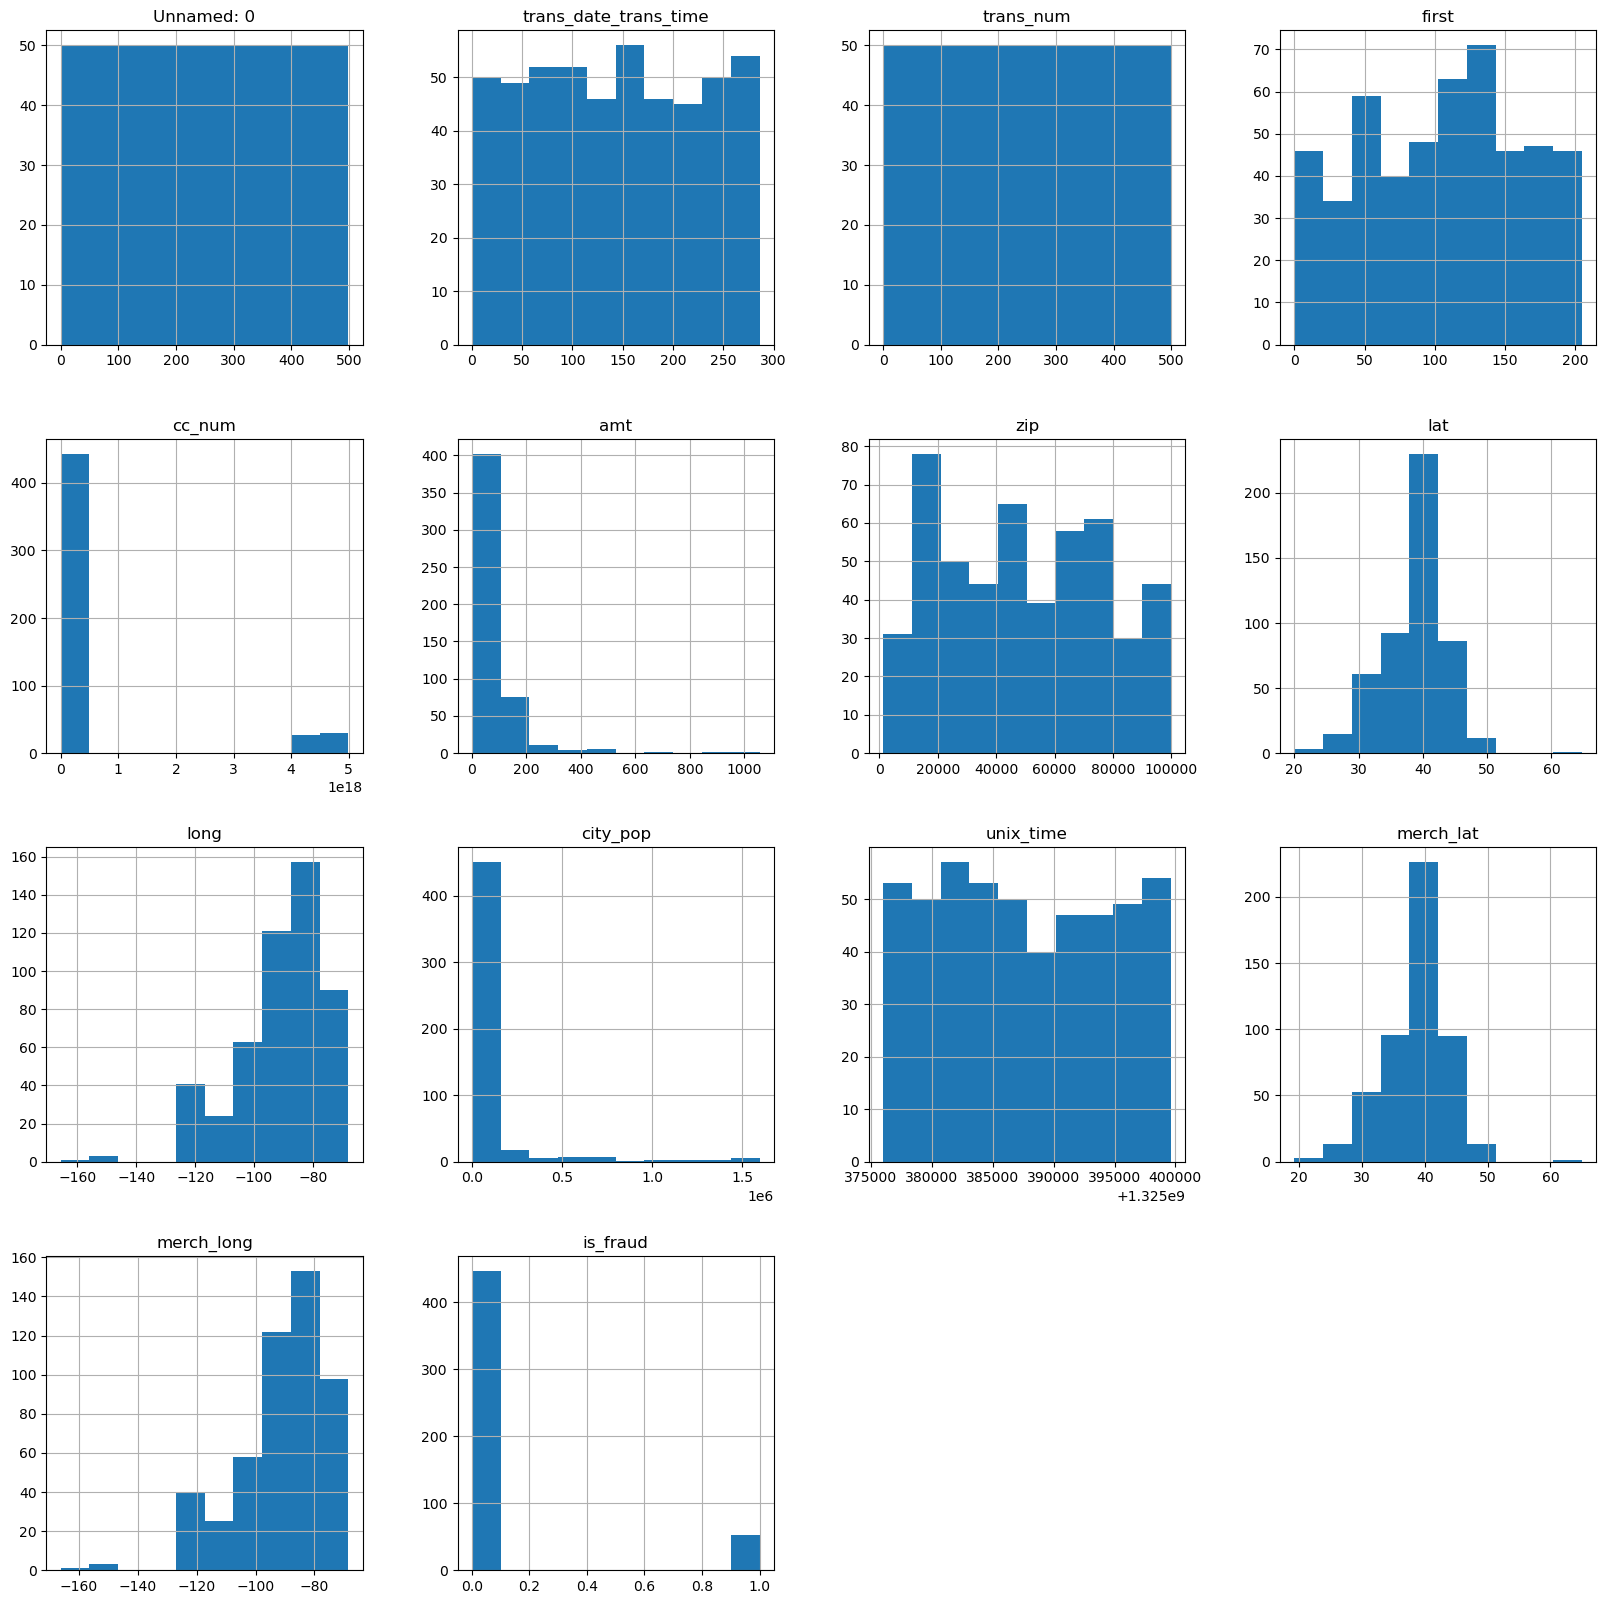

In [42]:
data.hist(figsize=(20,20))

In [43]:
x=data.iloc[:,1:4]
x

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
495,283,343,53
496,283,417,126
497,284,490,203
498,285,226,109


In [44]:
y=data.iloc[:,-1:]
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [45]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
data.shape

(500, 23)

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.09363813]
 [0.12848432]
 [0.07485689]
 [0.15017812]
 [0.08651191]
 [0.12198913]
 [0.1073954 ]
 [0.05359337]
 [0.11353969]
 [0.06492535]
 [0.07712676]
 [0.10586238]
 [0.11564162]
 [0.14590856]
 [0.10501805]
 [0.08033159]
 [0.14236121]
 [0.06337676]
 [0.08354122]
 [0.05971366]
 [0.14530543]
 [0.12166619]
 [0.10104326]
 [0.06578289]
 [0.1417621 ]
 [0.09292052]
 [0.07515544]
 [0.10844929]
 [0.0634837 ]
 [0.09957115]
 [0.10356909]
 [0.13267802]
 [0.15027235]
 [0.0657731 ]
 [0.1242909 ]
 [0.15199765]
 [0.11311   ]
 [0.07869799]
 [0.07321057]
 [0.08057059]
 [0.08240003]
 [0.08759186]
 [0.09403823]
 [0.1475537 ]
 [0.09931675]
 [0.0826492 ]
 [0.09718906]
 [0.05205808]
 [0.14110808]
 [0.07662059]
 [0.13822936]
 [0.14839609]
 [0.14969305]
 [0.07829879]
 [0.14359856]
 [0.05848993]
 [0.11265551]
 [0.10084787]
 [0.09599535]
 [0.10941317]
 [0.13915794]
 [0.08420148]
 [0.07081358]
 [0.11113734]
 [0.07744994]

In [48]:
diff=ytest-ypred
diff

,is_fraud
361,-0.093638
73,0.871516
374,-0.074857
155,-0.150178
104,-0.086512
...,...
347,-0.082703
86,-0.146282
75,-0.094519
438,-0.078203


In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))
print()
print('R-Square: \t', r2_score (ytest, ypred))


Mean Squared Error: 	 0.08915114881435775

RMSE: 	 0.2985818963272183

Variance Score:	 0.009629920216875254

R-Square: 	 0.009431679840469442


In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(xtrain, ytrain)
X_test_lda = lda.transform(xtest)
regression_model = LinearRegression()
regression_model.fit(X_train_lda, ytrain)
y_pred = regression_model.predict(X_test_lda)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.08915114881435775


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)
regression_model = LinearRegression()
regression_model.fit(X_train_pca, ytrain)
y_pred = regression_model.predict(X_test_pca)
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.08915114881435775


In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
}
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, ytrain)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.08915114881435775


In [53]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'fit_intercept': [True, False],
}
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,      
    scoring='neg_mean_squared_error',  
    random_state=42
)
random_search.fit(X_train_pca, ytrain)


best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.08915114881435775


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, ytrain)
X_test_lda = lda.transform(X_test)

pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_lda)
X_test_pca = pca.transform(X_test_lda)

regression_model = LinearRegression()

param_dist = {
    'fit_intercept': [True, False],
}

random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,       
    scoring='neg_mean_squared_error',  
    random_state=42 
)
random_search.fit(X_train_pca, ytrain)
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 0.08915114881435775


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [55]:
data['is_fraud'].value_counts()

0    447
1     53
Name: is_fraud, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
x_resampled

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
889,97,315,77
890,44,209,149
891,269,220,116
892,203,456,182


In [57]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
889,1
890,1
891,1
892,1


In [58]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled, test_size=0.36, random_state=42)

In [59]:
xtrain.shape

(572, 3)

In [60]:
xtest.shape

(322, 3)

In [61]:
ytrain.shape

(572, 1)

In [62]:
ytest.shape

(322, 1)

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print("Training Started.....\n")
print()
lin_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=lin_reg.predict(xtest)
print("predicted Total Payment\n",ypred)
print('\n Testing is also completed....\n')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))
print()
print('R-Square: \t', r2_score (ytest, ypred))

Training Started.....




Training completed....

Testing invoked
predicted Total Payment
 [[0.60277438]
 [0.68862285]
 [0.55945228]
 [0.43939013]
 [0.57646343]
 [0.65998464]
 [0.48840696]
 [0.67354159]
 [0.53748816]
 [0.66137233]
 [0.60823584]
 [0.51781349]
 [0.43131444]
 [0.4817404 ]
 [0.64685632]
 [0.47371387]
 [0.57568051]
 [0.50300358]
 [0.56030241]
 [0.40455291]
 [0.64539433]
 [0.49184526]
 [0.61689521]
 [0.46517137]
 [0.3337852 ]
 [0.59812887]
 [0.32223723]
 [0.69546385]
 [0.3731881 ]
 [0.43115755]
 [0.56980927]
 [0.48114104]
 [0.72760349]
 [0.64161244]
 [0.44911697]
 [0.66599428]
 [0.35605313]
 [0.50761114]
 [0.592127  ]
 [0.38938368]
 [0.56308688]
 [0.73131435]
 [0.65056458]
 [0.57611621]
 [0.51072875]
 [0.63700227]
 [0.36712309]
 [0.44656983]
 [0.45685086]
 [0.74273289]
 [0.54210742]
 [0.58821887]
 [0.57157826]
 [0.53773066]
 [0.50258778]
 [0.59610791]
 [0.37352857]
 [0.54995632]
 [0.49413538]
 [0.35242912]
 [0.32397873]
 [0.71190259]
 [0.68406714]
 [0.39273538]
 [0.53134036]

In [ ]:
from sklearn.model_selection import cross_val_score
regression_model = LinearRegression()

num_folds = 5 
mse_scores = -cross_val_score(regression_model, X_train_pca, ytrain, cv=num_folds, scoring='neg_mean_squared_error')
average_mse = mse_scores.mean()
print(f"Average Mean Squared Error from {num_folds}-fold cross-validation: {average_mse}")
regression_model.fit(X_train_pca, ytrain)
y_pred = regression_model.predict(X_test_pca)

mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error on the test set: {mse}")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

regression_model = LinearRegression()
param_dist = {
    'fit_intercept': [True, False],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=kf,  
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train_pca, ytrain)
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = random_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train_pca, ytrain, cv=kf, scoring='neg_mean_squared_error')
mse_mean = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {mse_mean}")

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

loocv = KFold(n_splits=len(X_train_pca))
regression_model = LinearRegression()
mse_scores = []
X_train_pca = np.array(X_train_pca)
ytrain = np.array(ytrain)
for train_index, test_index in loocv.split(X_train_pca):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = ytrain[train_index], ytrain[test_index]  # Make sure to use 'Ytrain' here

    regression_model.fit(X_train_cv, y_train_cv)

    y_pred_cv = regression_model.predict(X_test_cv)
    mse_fold = mean_squared_error(y_test_cv, y_pred_cv)
    mse_scores.append(mse_fold)
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (LOOCV): {mse_mean}")

Mean Squared Error (LOOCV): 0.25157969021153936
